(3603, 37)
鄉鎮市區                    object
交易標的                    object
土地區段位置建物區段門牌            object
土地移轉總面積平方公尺            float64
都市土地使用分區                object
非都市土地使用分區              float64
非都市土地使用編定              float64
交易年月日           datetime64[ns]
交易筆棟數                   object
移轉層次                    object
總樓層數                    object
建物型態                    object
主要用途                    object
主要建材                    object
建築完成年月                  object
建物移轉總面積平方公尺            float64
建物現況格局-房                 int64
建物現況格局-廳                 int64
建物現況格局-衛                 int64
建物現況格局-隔間               object
有無管理組織                  object
總價元                      int64
單價元平方公尺                float64
車位類別                    object
車位移轉總面積平方公尺            float64
車位總價元                    int64
備註                      object
編號                      object
主建物面積                  float64
附屬建物面積                 float64
陽台面積                   float64
電梯                      obje

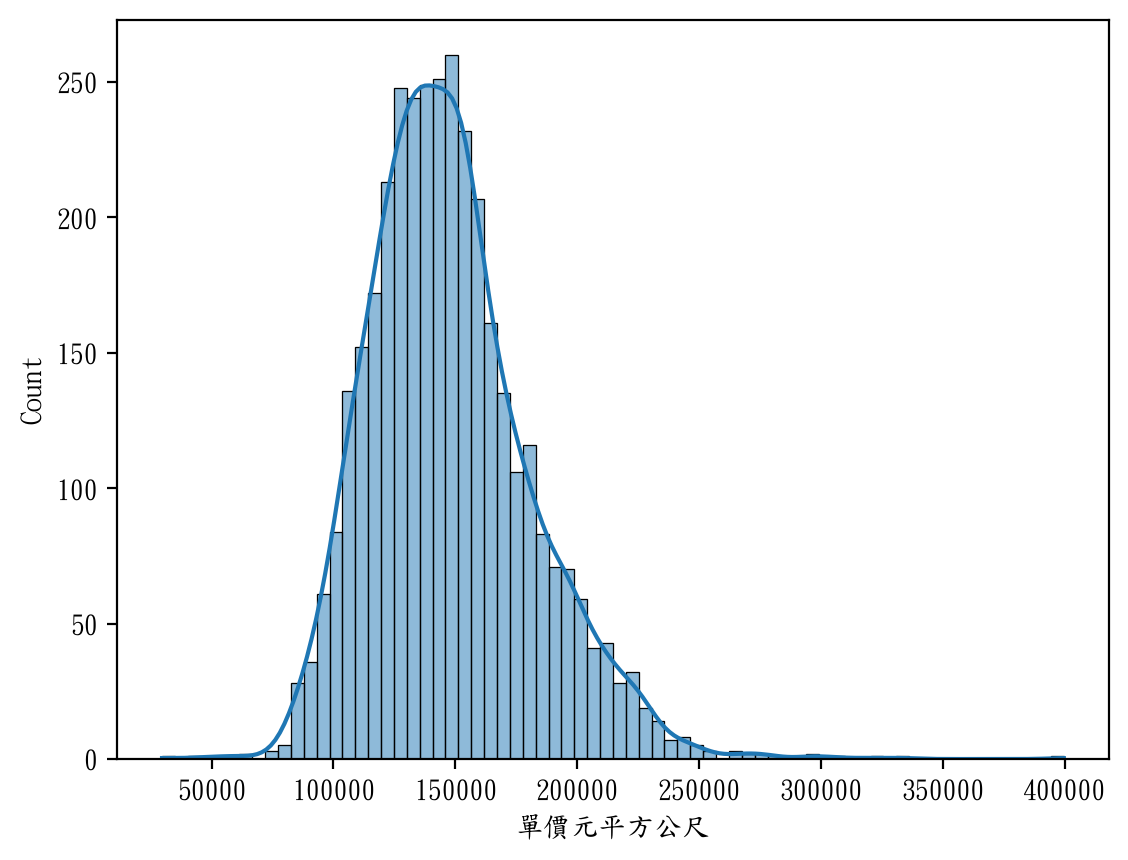

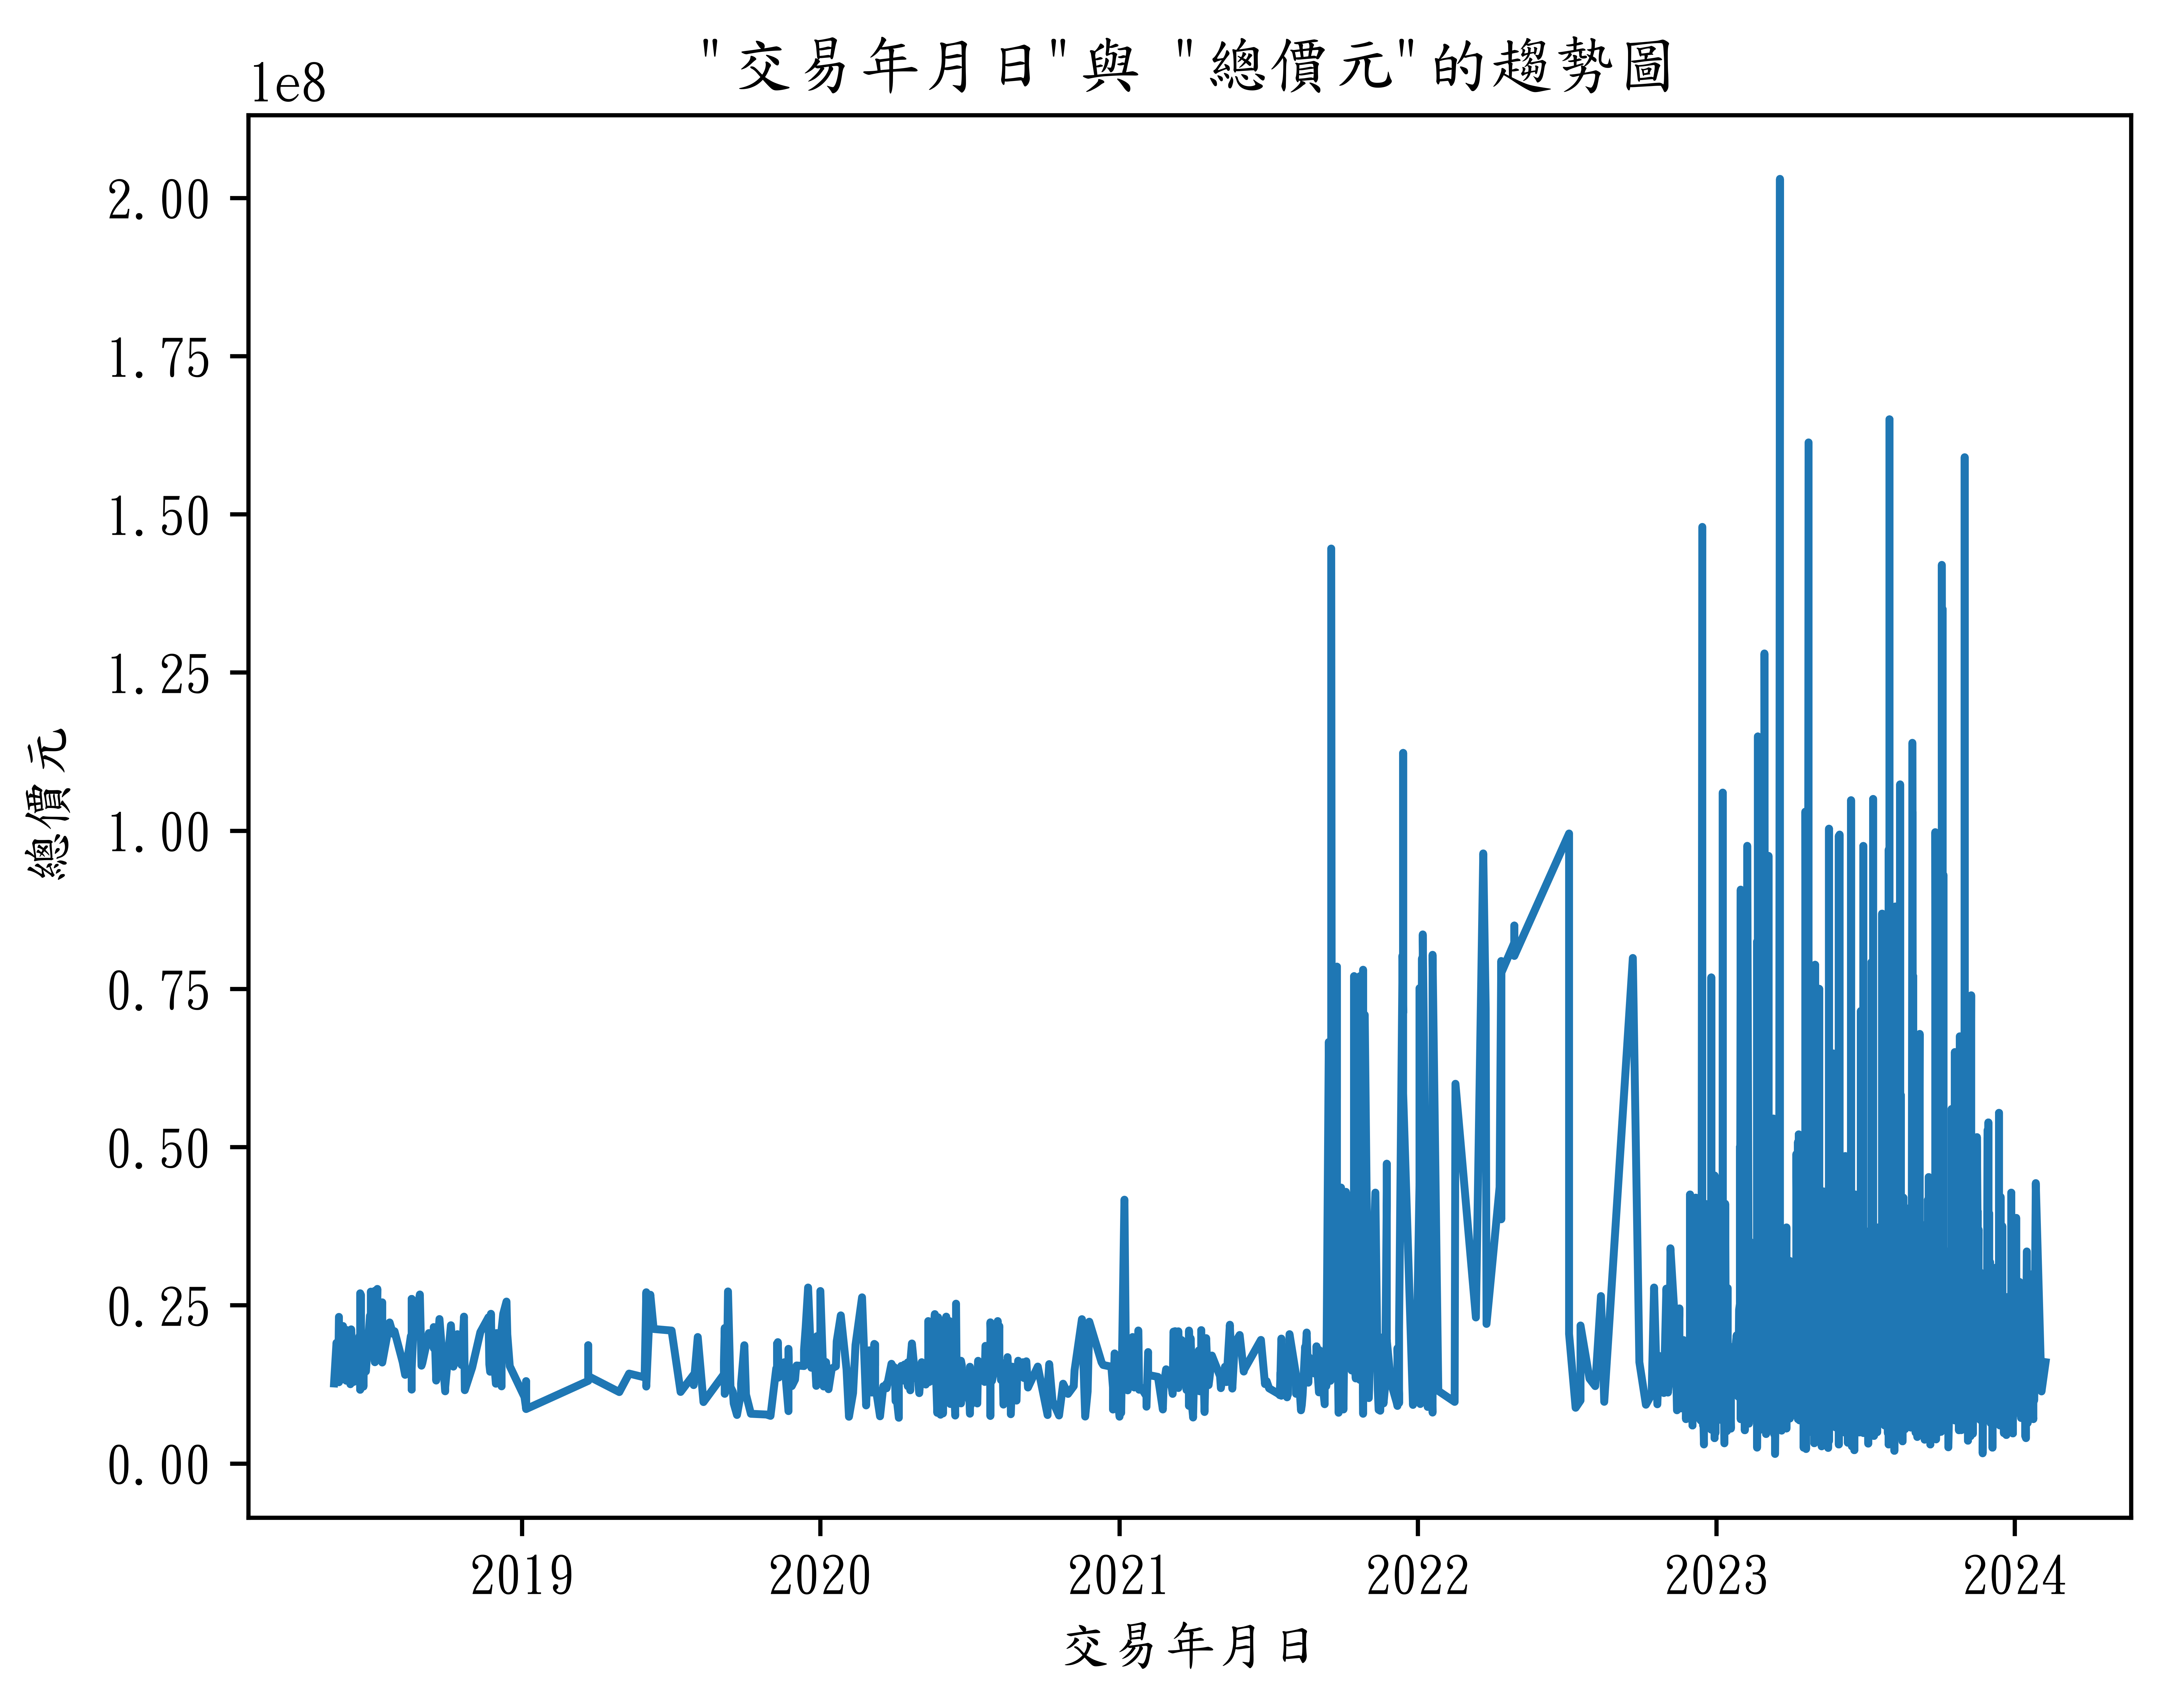

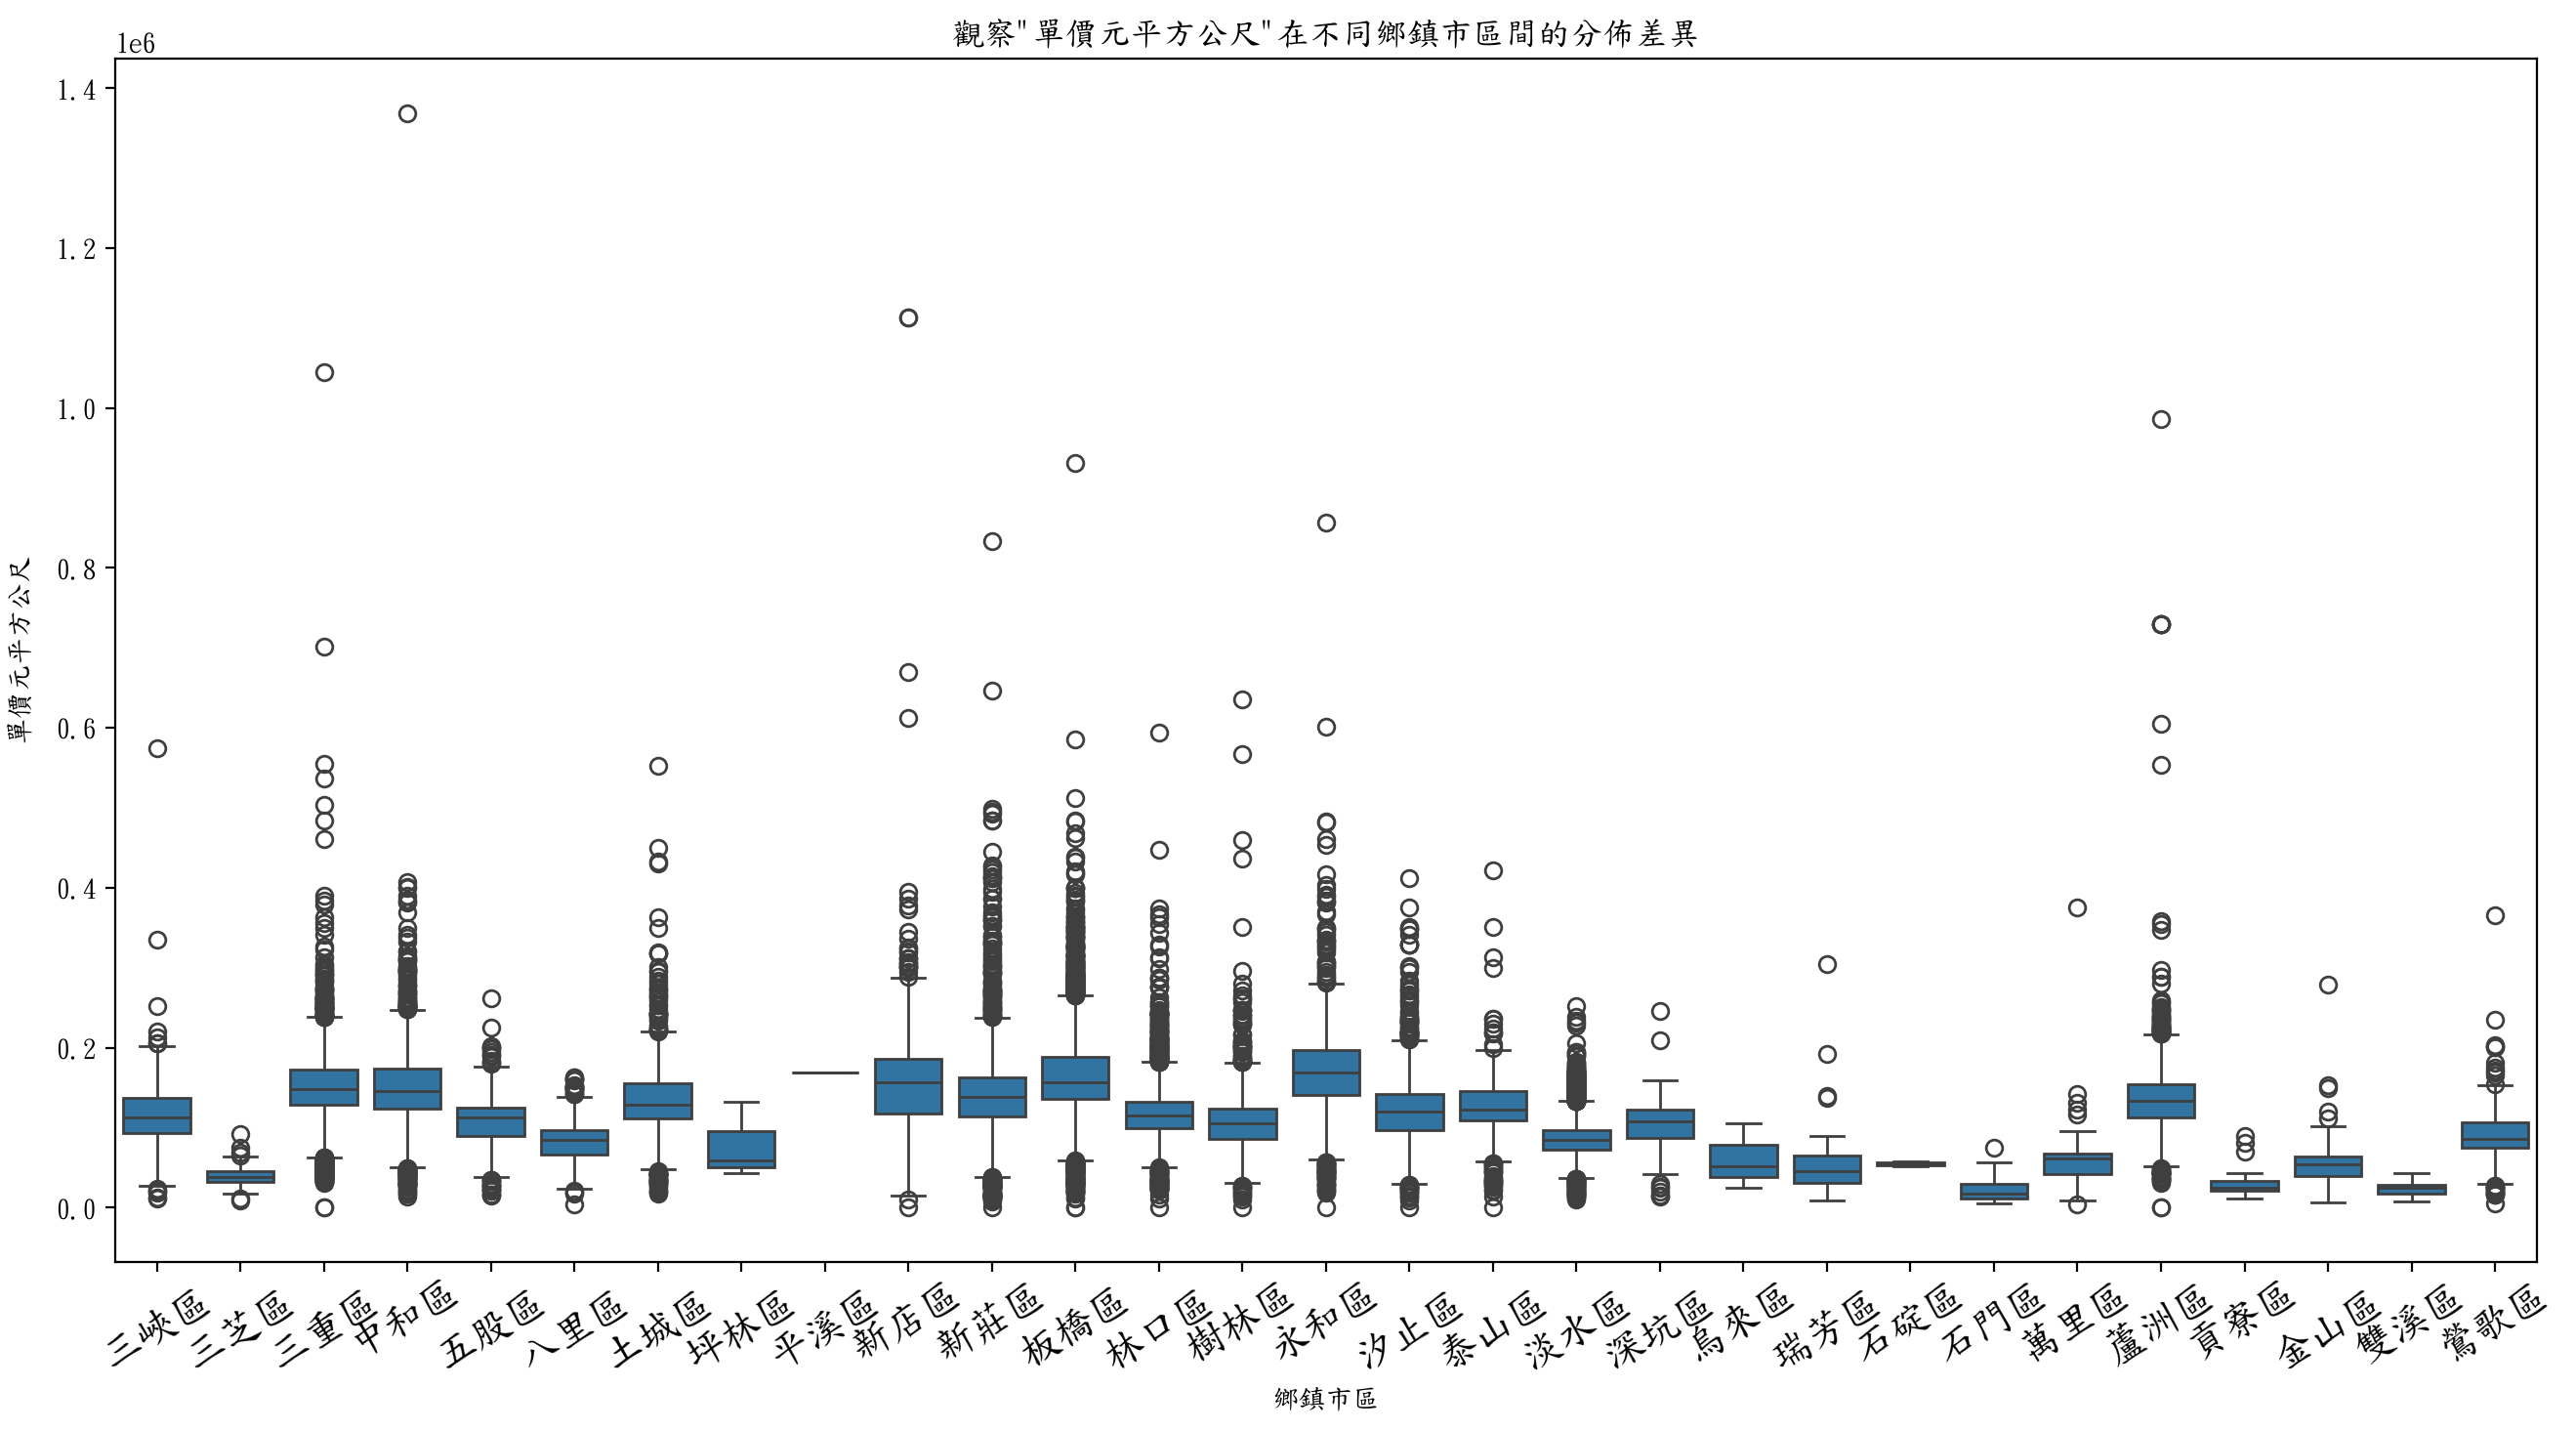

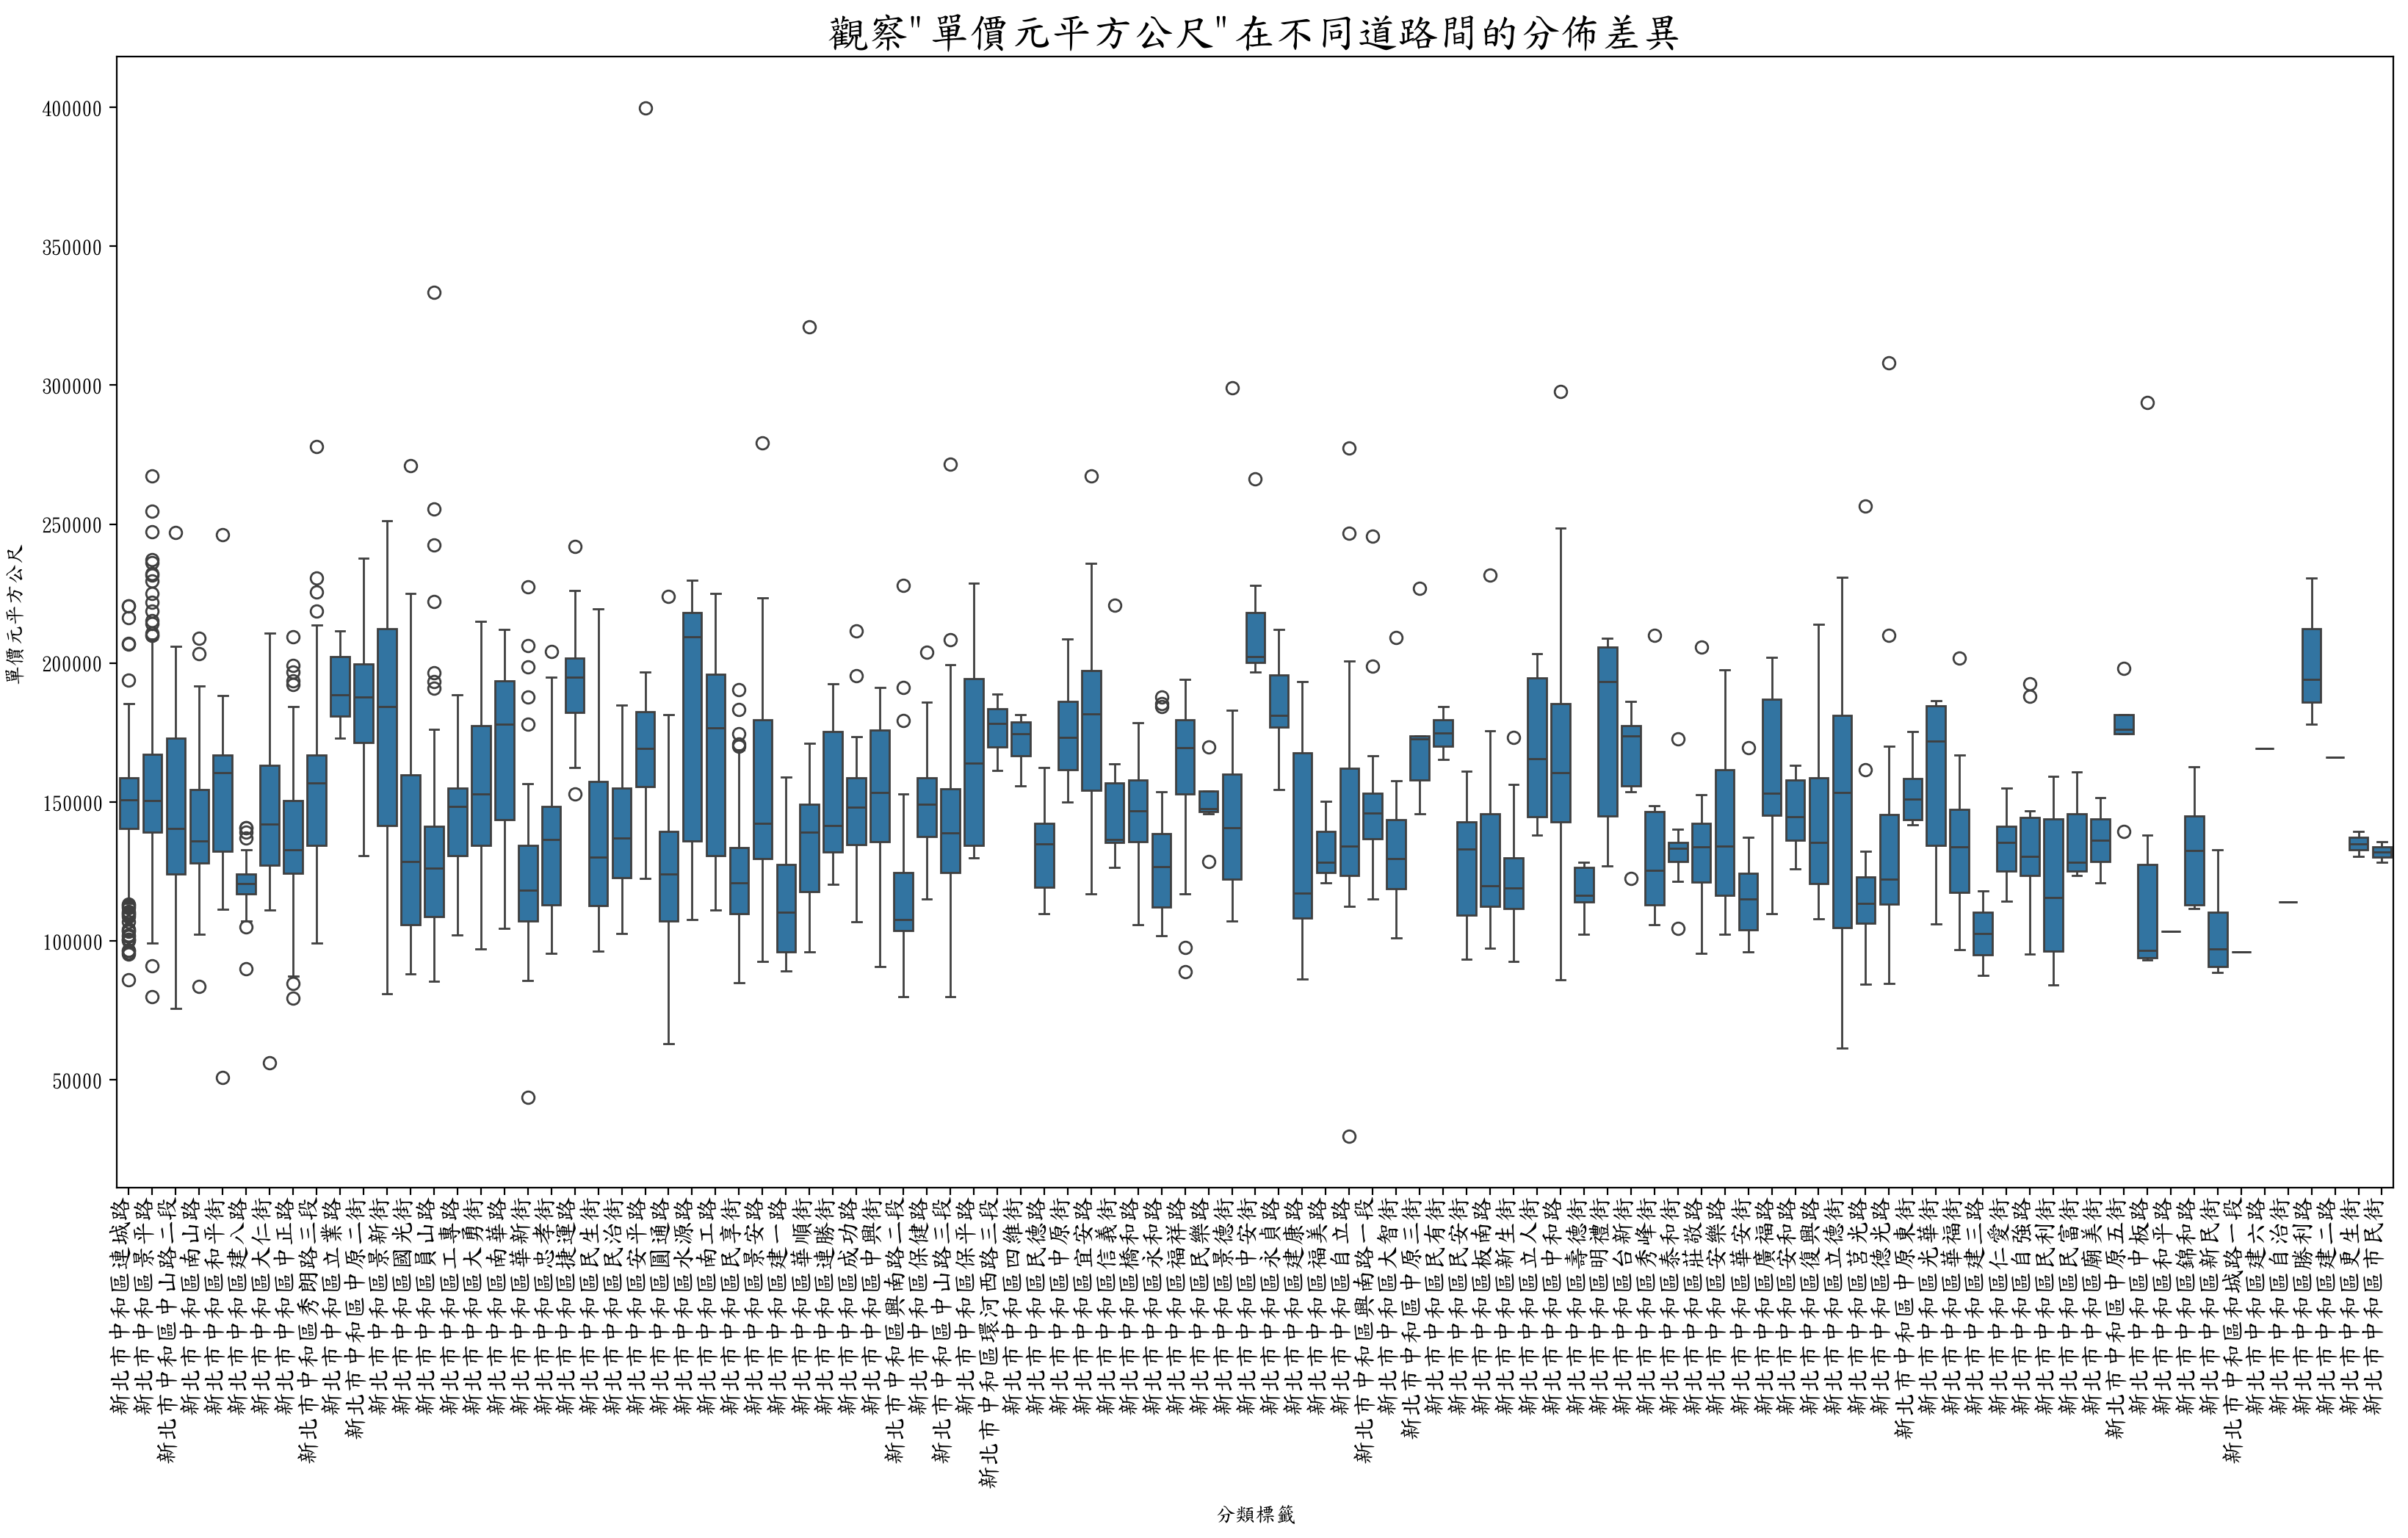

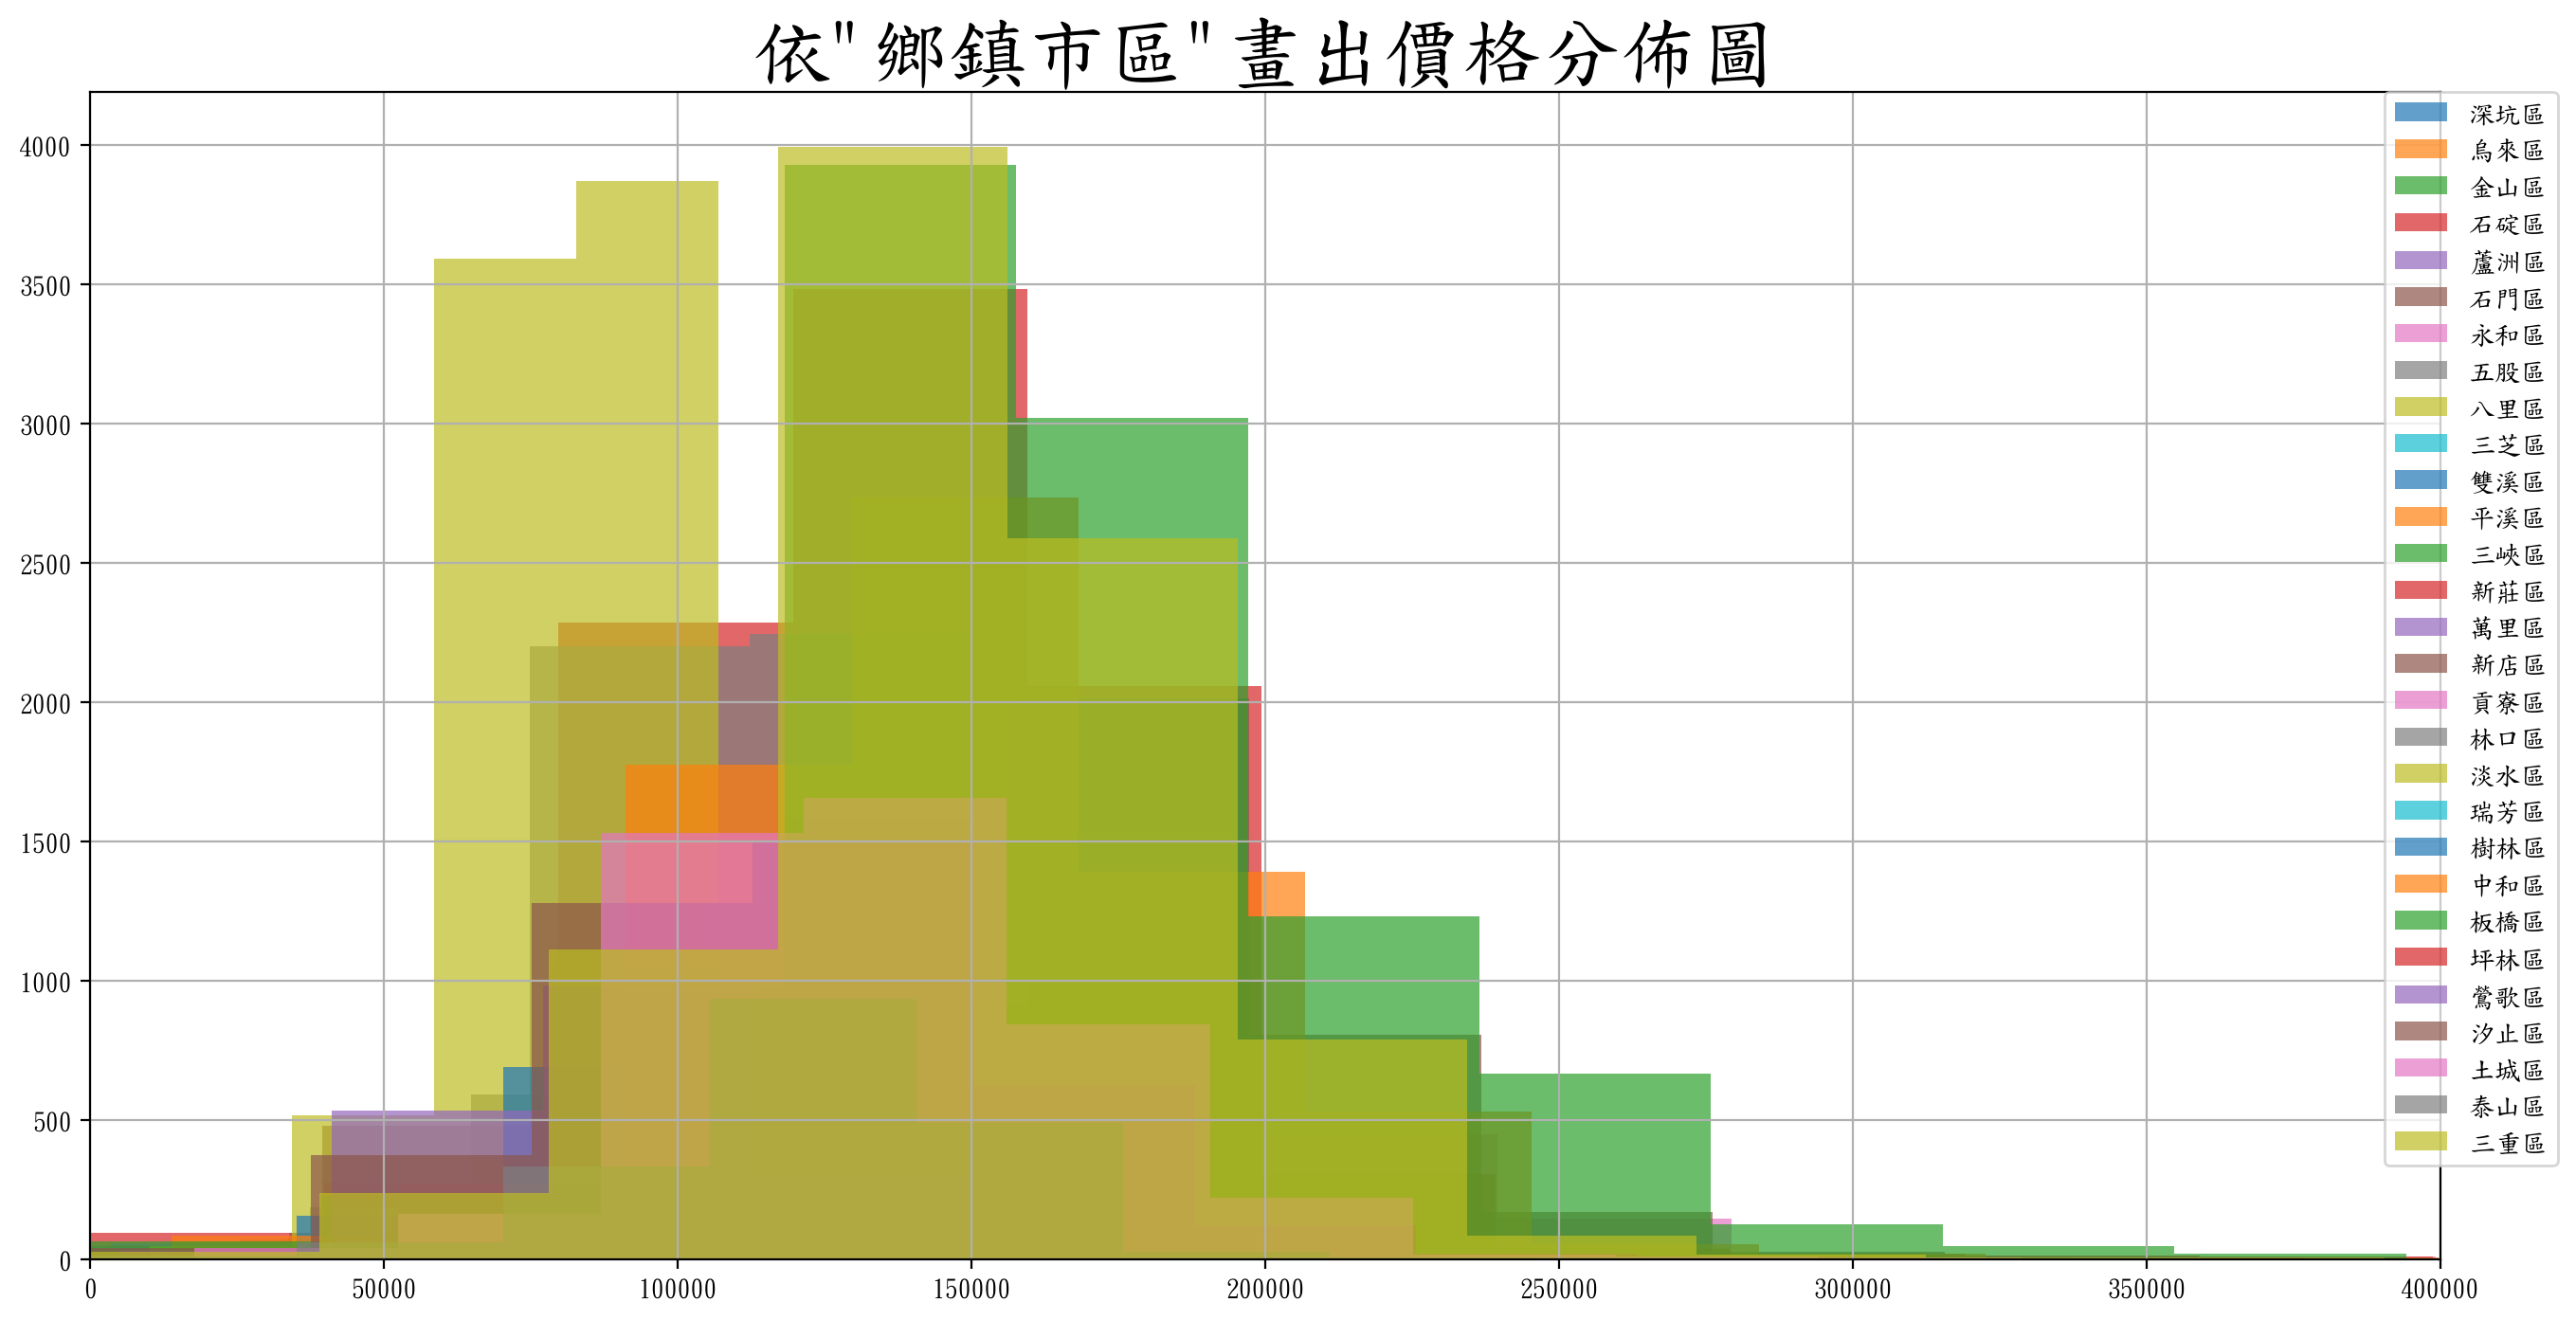

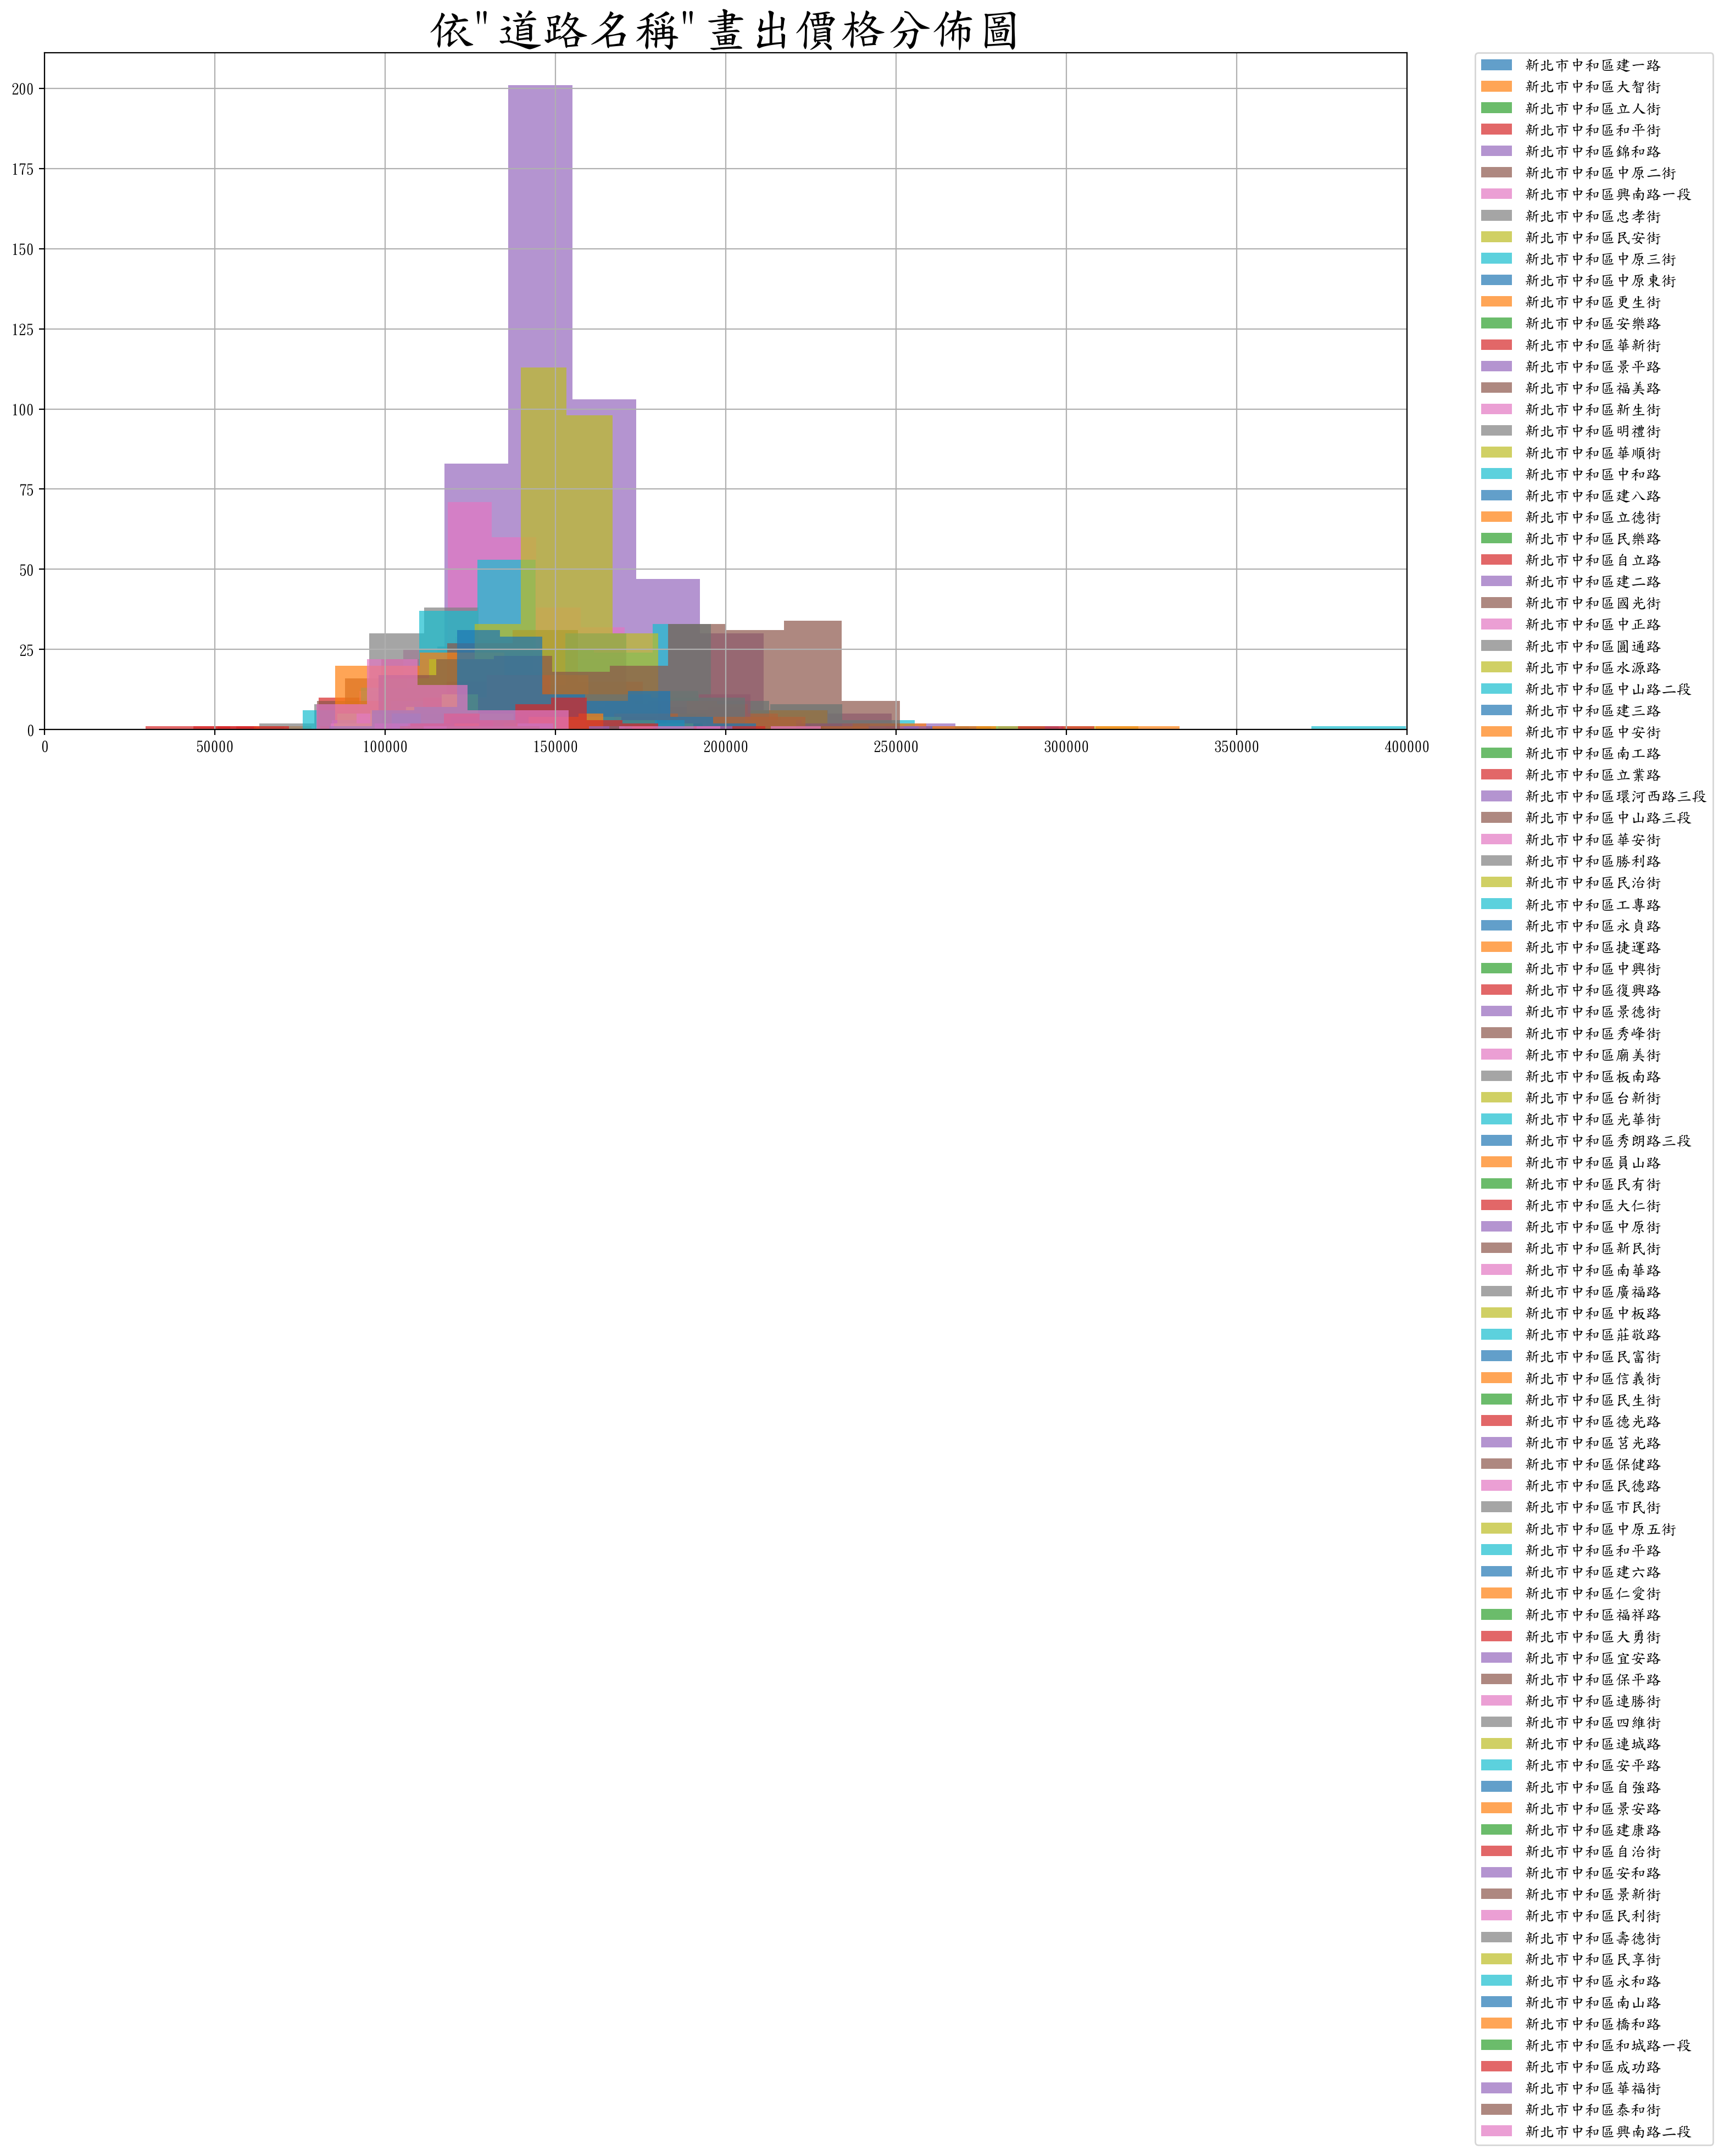

In [1]:
import pandas as pd
df = pd.read_csv('./data/real_estate_cleaned.csv', encoding = 'utf-8')

print(df.shape)

# 將'交易年月日'改成日期格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'])
print(df.dtypes)



import seaborn as sns
import matplotlib.pyplot as plt

'''
查詢電腦中文字體
from matplotlib.font_manager import fontManager
for i in sorted(fontManager.get_font_names()):
    print(i)
'''

# 將圖表標題改為標楷體
import matplotlib
matplotlib.rc('font', family = 'DFKai-SB')

# 提高jupyter notebook圖形顥示解析度
%config InlineBackend.figure_format = 'retina'

# 繪製不動產價格直方圖
sns.histplot(df['單價元平方公尺'], kde = True)
plt.show()


# 以交易年月日'做升冪排序
df = df.sort_values(by = '交易年月日', ascending = True)

# 繪製'交易年月日'與'總價元'的時間趨勢圖，分析市場價格變化
date = df['交易年月日']
price = df['總價元']
fig = plt.figure(dpi = 600)
ax = fig.add_subplot(111)
ax.set_xlabel('交易年月日')
ax.set_ylabel('總價元')
ax.set_title('"交易年月日"與 "總價元"的趨勢圖')

ax.plot(date, price)
plt.show()





# 使用boxplot觀察'單價元平方公尺'在不同'鄉鎮市區'間的分佈差異。
df_all = pd.read_csv('./data/real_estate_raw_NewTaipei_City_cleaned.csv', encoding = 'utf-8', low_memory = False)

ax = sns.boxplot(x = '鄉鎮市區', y = '單價元平方公尺', data = df_all)

# 調整seaborn圖表大小
ax.figure.set_size_inches(16, 8)
plt.title('觀察"單價元平方公尺"在不同鄉鎮市區間的分佈差異')

# 將x軸標籤旋30度
plt.setp(ax.get_xticklabels(), rotation = 30, fontsize = 15)
plt.ylabel('單價元平方公尺')
plt.show()

# 使用boxplot觀察'單價元平方公尺'在不同'分類標籤'間的分佈差異。
ax = sns.boxplot(x = '分類標籤', y = '單價元平方公尺', data = df)

# 調整seaborn圖表大小
ax.figure.set_size_inches(20, 10)
plt.title('觀察"單價元平方公尺"在不同道路間的分佈差異', fontsize = 20)

# 將x軸標籤旋90度
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 12)
plt.ylabel('單價元平方公尺')
plt.show()




# 用分佈圖觀察'單價元平方公尺'在不同'鄉鎮市區'間的分佈差異
fig = plt.figure()
fig.figure.set_size_inches(16, 8)
# 調整全部圖表字體大小 plt.rcParams['font.size'] = 20
for district in set(df_all['鄉鎮市區']):
    df_alldistrict = df_all[df_all['鄉鎮市區'] == district]
    df_alldistrict['單價元平方公尺'][df_alldistrict['單價元平方公尺'] < 400000].hist(alpha = 0.7)
plt.xlim(0, 400000)
plt.legend(set(df_all['鄉鎮市區']),loc = 0, bbox_to_anchor = (1.05, 1.0), borderaxespad = 0.)
plt.title('依"鄉鎮市區"畫出價格分佈圖', fontsize = 30)

plt.show()

# 依不同道路標籤繪製直方圖
fig = plt.figure()
fig.figure.set_size_inches(16, 8)
for road in set(df['分類標籤']):
    dfroad = df[df['分類標籤'] == road]
    dfroad['單價元平方公尺'][dfroad['單價元平方公尺'] < 400000].hist(alpha = 0.7)
plt.xlim(0, 400000)
plt.legend(set(df['分類標籤']),loc = 0, bbox_to_anchor = (1.05, 1.0), borderaxespad = 0.)
plt.title('依"道路名稱"畫出價格分佈圖', fontsize = 30)

plt.show()


